In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
mnist = load_digits()
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
list(mnist.keys())

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

In [4]:
len(mnist.data),len(mnist.target),len(mnist.feature_names),len(mnist.target_names)

(1797, 1797, 64, 10)

In [5]:
mnist["data"][1600]

array([ 0.,  2., 13., 16., 12.,  0.,  0.,  0.,  0.,  9., 15., 10., 16.,
        3.,  0.,  0.,  0.,  5.,  7.,  5., 16.,  3.,  0.,  0.,  0.,  0.,
        0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,
        0.,  0.,  0., 14., 16.,  1.,  3.,  7.,  1.,  0.,  3., 16., 12.,
       10., 16., 11.,  1.,  0.,  0., 13., 16., 13.,  7.,  1.,  0.])

In [6]:
# Create X and y
X, y = mnist["data"], mnist['target']

In [7]:
X.shape

(1797, 64)

In [8]:
y.shape

(1797,)

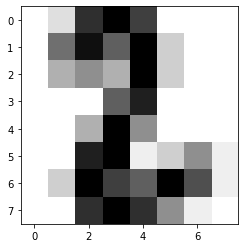

In [9]:
some_digits = X[1600]
some_digits_image = some_digits.reshape(8, 8)
plt.imshow(some_digits_image, cmap = matplotlib.cm.binary, interpolation='nearest')
# plt.axis('off')
plt.show()


In [10]:
y[1600]

2

### Model creation

In [11]:
# Manually split train/test set
X_train, X_test, y_train, y_test = X[:1500], X[297:], y[:1500], y[297:]

In [12]:
X_test.shape

(1500, 64)

In [13]:
# Add a layer of randomness by randomly permutatig X_train and y_train
# np.random(seed=42)
shuffle_index = np.random.permutation(1500)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [14]:
# Create a binary classifier, capable of distinguishing between just two classes, 2 and not-2. 
# Let’s create the target vectors for this classification task

# y_train_2 = y_train==2
# y_test_2 = y_test==2

# from sklearn.linear_model import SGDClassifier

# sgd_clf = SGDClassifier(random_state=42)

# sgd_clf.fit(X_train, y_train_2)

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [16]:
# Those are the first 10 predictions of the first 10 arrays in X
sgd_clf.predict([i for i in X_test[0:10]])

array([4, 1, 7, 7, 3, 5, 1, 0, 0, 2])

In [17]:
# It correctly predict the first 10 arrays of the test set
y_test[0:10]

array([4, 1, 7, 7, 3, 5, 1, 0, 0, 2])

In [18]:
# The prediction score is quite high being accurate almost 97% of cases
sgd_clf.score(X_test, y_test)

0.968

In [19]:
# Let’s use the cross_val_score() function to evaluate the SGDClassifier model 
# using K-fold cross-validation, with three folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.932, 0.942, 0.938])

* Results of cross_val looks a bit lower. So chances are the train set was quite a bit more 'predictable'.

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
y_train_pred

array([4, 1, 5, ..., 0, 4, 9])

In [21]:
# Use the confusion matrix w/y_train_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[149,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0, 130,   1,   1,   0,   0,   3,   0,  14,   2],
       [  0,   0, 148,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 147,   0,   1,   0,   0,   2,   3],
       [  0,   0,   0,   0, 143,   0,   1,   2,   0,   2],
       [  1,   0,   2,   0,   0, 143,   1,   0,   0,   5],
       [  0,   1,   0,   0,   1,   1, 148,   0,   0,   0],
       [  0,   0,   0,   1,   1,   0,   0, 144,   0,   3],
       [  0,   8,   2,  12,   0,   1,   1,   0, 115,   7],
       [  0,   1,   0,   3,   0,   1,   0,   2,   3, 139]])

#### Each row of the confusion metrix represent an actual class (so from 0 to 9, rows=y_train, col=y_train_pred).

Second row: 
   * 146 '1s' (y_train=y_train_pred) were correctly guessed as '1s'(true positive) 
   * on the col: 14 were wrongly guessed as '1s', while should have been '8s'
   * on the row: 2 were guessed as '5s' but were actually '1s'
   
The lower on the diag = lower sample/more wrongly guessed 

In [22]:
cnt = 0
for i in y_train_pred:
    if i==1:
        cnt = cnt +1
cnt

140

In [23]:
cnt = 0
for i in y_train:
    if i==1:
        cnt = cnt +1
cnt

151

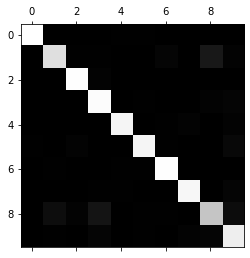

In [24]:
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()
# The darker on the diag = lower sample/more wrongly guessed 

In [25]:
# Plot the errors. 
# Divide each value in the confusion matrix by the number of images in the corresponding class, 
# so we can compare error rates instead of absolute number of errors 
# which would make abundant classes look unfairly bad
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm/row_sums
norm_cm

array([[0.98675497, 0.        , 0.        , 0.        , 0.00662252,
        0.00662252, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.86092715, 0.00662252, 0.00662252, 0.        ,
        0.        , 0.01986755, 0.        , 0.09271523, 0.01324503],
       [0.        , 0.        , 0.98666667, 0.01333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.96078431, 0.        ,
        0.00653595, 0.        , 0.        , 0.0130719 , 0.01960784],
       [0.        , 0.        , 0.        , 0.        , 0.96621622,
        0.        , 0.00675676, 0.01351351, 0.        , 0.01351351],
       [0.00657895, 0.        , 0.01315789, 0.        , 0.        ,
        0.94078947, 0.00657895, 0.        , 0.        , 0.03289474],
       [0.        , 0.00662252, 0.        , 0.        , 0.00662252,
        0.00662252, 0.98013245, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

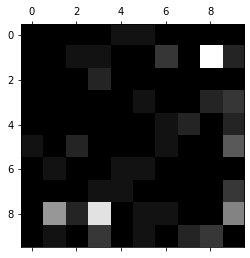

In [26]:
# Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:
np.fill_diagonal(norm_cm,0)
plt.matshow(norm_cm, cmap=plt.cm.gray)
plt.show()
# The brightest = most mistakes ie. '1s' with '8s' or '5s' with '9s' 

* Way to improve the classifier:
 - Gather more data for these digits
 - Engineer new features like writing an algorithm to count the number of closed loops (ie., 8 has two, 6 has one)
 - Or preprocess the images (ie., using Scikit-Image, Pillow, or OpenCV) to make some patterns stand out more, such as closed loops.

* Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and 
why it is failing, but it is more difficult and time-consuming